# **Global AI Hub Machine Learning Bootcamp - Movie Recommendation using Machine Learning Algorithms**

# 1 - Importing required Libraries

In [ ]:
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import StandardScaler, MultiLabelBinarizer
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
import warnings
import pandas as pd
import numpy as np
import seaborn as sns
import os
import ast
warnings.filterwarnings("ignore")

# 2 - Loading Data from Kagglehub

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("tmdb/tmdb-movie-metadata")

print("Path to dataset files:", path)

100%|██████████| 8.89M/8.89M [00:00<00:00, 80.1MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/tmdb/tmdb-movie-metadata/versions/2


In [ ]:
# Paths do data:
movies_path = "/root/.cache/kagglehub/datasets/tmdb/tmdb-movie-metadata/versions/2/tmdb_5000_movies.csv"
credits_path = "/root/.cache/kagglehub/datasets/tmdb/tmdb-movie-metadata/versions/2/tmdb_5000_credits.csv"

# movies_path = "/kaggle/input/tmdb-movie-metadata/tmdb_5000_movies.csv"
# credits_path = "/kaggle/input/tmdb-movie-metadata/tmdb_5000_credits.csv"

# Read .csv files using Pandas
movies = pd.read_csv(movies_path)
credits = pd.read_csv(credits_path)

# 3 - Exploratory Data Analysis (EDA)

In [ ]:
# Take a look to the first 5 columns of the dataset

movies.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [ ]:
# Dataset shape and data types

print("\nDataset Shape and Data Types:", movies.shape, movies.dtypes)


Dataset Shape and Data Types: (4803, 20) budget                    int64
genres                   object
homepage                 object
id                        int64
keywords                 object
original_language        object
original_title           object
overview                 object
popularity              float64
production_companies     object
production_countries     object
release_date             object
revenue                   int64
runtime                 float64
spoken_languages         object
status                   object
tagline                  object
title                    object
vote_average            float64
vote_count                int64
dtype: object


In [ ]:
print("\nData Types and Non-Null Counts:")
display(movies.info())


Data Types and Non-Null Counts:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   o

None

## 3.1 - Missing Data Analysis

In [ ]:
# Calculate total and percentage of missing values per column
missing_counts = movies.isnull().sum().sort_values(ascending=False)
missing_percent = (movies.isnull().mean() * 100).sort_values(ascending=False)

missing_df = pd.DataFrame({
    'missing_count': missing_counts,
    'missing_percent': missing_percent
})

print("Missing Values per Column:")
display(missing_df)

Missing Values per Column:


,missing_count,missing_percent
homepage,3091,64.355611
tagline,844,17.572351
overview,3,0.062461
runtime,2,0.041641
release_date,1,0.020820
id,0,0.000000
budget,0,0.000000
genres,0,0.000000
original_title,0,0.000000
popularity,0,0.000000


### 3.1.1 - Numeric Feature Distributions and Summary Statistics

Summary Statistics:


,count,mean,std,min,25%,50%,75%,max
budget,4803.0,2.904504e+07,4.072239e+07,0.0,790000.00000,1.500000e+07,4.000000e+07,3.800000e+08
revenue,4803.0,8.226064e+07,1.628571e+08,0.0,0.00000,1.917000e+07,9.291719e+07,2.787965e+09
popularity,4803.0,2.149230e+01,3.181665e+01,0.0,4.66807,1.292159e+01,2.831350e+01,8.755813e+02
runtime,4801.0,1.068759e+02,2.261193e+01,0.0,94.00000,1.030000e+02,1.180000e+02,3.380000e+02
vote_count,4803.0,6.902180e+02,1.234586e+03,0.0,54.00000,2.350000e+02,7.370000e+02,1.375200e+04
vote_average,4803.0,6.092172e+00,1.194612e+00,0.0,5.60000,6.200000e+00,6.800000e+00,1.000000e+01


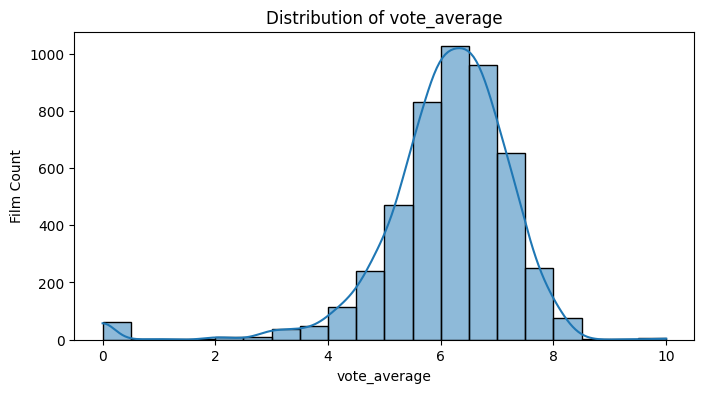

In [ ]:
numeric_cols = ['budget', 'revenue', 'popularity', 'runtime', 'vote_count', 'vote_average']

print("Summary Statistics:")
display(movies[numeric_cols].describe().T)

# Histogram of vote_average
plt.figure(figsize=(8,4))
sns.histplot(movies['vote_average'], bins=20, kde=True)
plt.title('Distribution of vote_average')
plt.xlabel('vote_average')
plt.ylabel('Film Count')
plt.show()

### 3.1.2 - Correlation Heatmap of Numeric Features

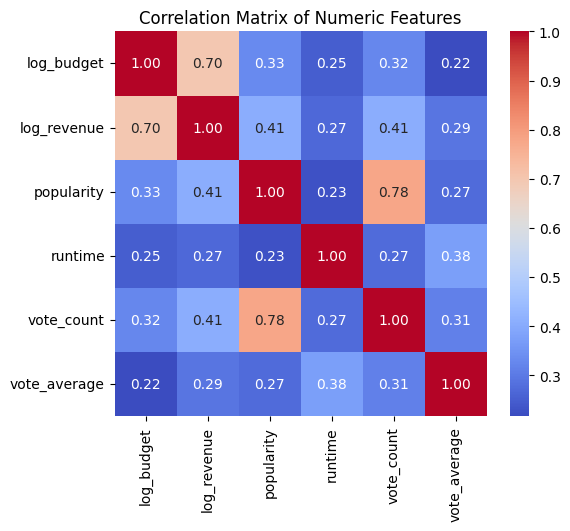

In [ ]:
# Apply log1p to budget and revenue to reduce skewness for visualization
movies['log_budget'] = np.log1p(movies['budget'])
movies['log_revenue'] = np.log1p(movies['revenue'])

corr_cols = ['log_budget', 'log_revenue', 'popularity', 'runtime', 'vote_count', 'vote_average']
corr_matrix = movies[corr_cols].corr()

plt.figure(figsize=(6,5))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix of Numeric Features')
plt.show()

We can determine that ```log_budget``` has a high correlation with ```log_revenue``` and ```vote_count``` has a high correlation with ```popularity```. We will definitely take those in consideration and use them for our model to increase the recommendation scores.

### 3.1.3 - Genre Analysis

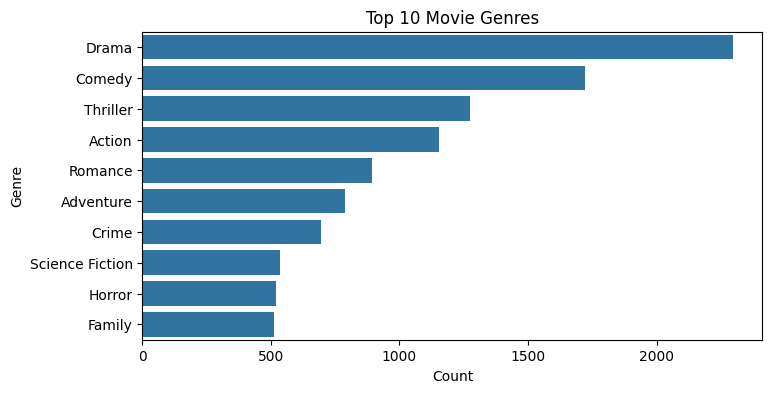

In [ ]:
# Parse 'genres' column into lists of genre names
def parse_genres(genres_str):
    try:
        return [g['name'] for g in ast.literal_eval(genres_str)]
    except:
        return []

movies['genres_list'] = movies['genres'].fillna('[]').apply(parse_genres)

# Explode and count top genres
genres_expanded = movies.explode('genres_list')
top_genres = genres_expanded['genres_list'].value_counts().head(10)

plt.figure(figsize=(8,4))
sns.barplot(x=top_genres.values, y=top_genres.index)
plt.title('Top 10 Movie Genres')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.show()

### 3.1.4 - Overview Text Length Analysis

Overview Length Summary:


,overview_length
count,4803.000000
mean,305.207995
std,162.886559
min,0.000000
25%,177.500000
50%,283.000000
75%,392.000000
max,1000.000000


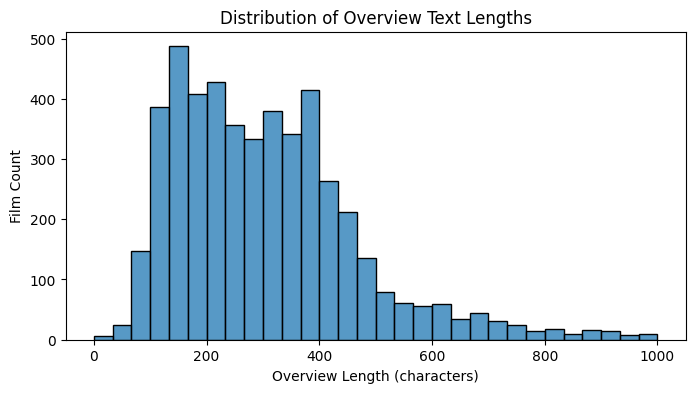

In [ ]:
# Compute overview length
movies['overview_length'] = movies['overview'].fillna('').apply(len)

print("Overview Length Summary:")
display(movies['overview_length'].describe().T)

# Histogram of overview lengths
plt.figure(figsize=(8,4))
sns.histplot(movies['overview_length'], bins=30, kde=False)
plt.title('Distribution of Overview Text Lengths')
plt.xlabel('Overview Length (characters)')
plt.ylabel('Film Count')
plt.show()

# 4 - Data Preprocessing

In this section we will clean our dataset and drop all colmuns which are not required for the model training. We will assign the cleaned/preprocessed data to a new dataset so the training performs better and works more smoothly.

In [ ]:
from scipy.sparse import hstack

In [ ]:
print("Initial dataset shape: ", movies.shape)
display(movies.head())

Initial dataset shape:  (4803, 24)


,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,spoken_languages,status,tagline,title,vote_average,vote_count,log_budget,log_revenue,genres_list,overview_length
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,19.283571,21.748578,"[Action, Adventure, Fantasy, Science Fiction]",175
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,19.519293,20.683485,"[Adventure, Fantasy, Action]",176
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,19.316769,20.596199,"[Action, Adventure, Crime]",240
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,19.336971,20.804790,"[Action, Crime, Drama, Thriller]",428
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,19.376192,19.464974,"[Action, Adventure, Science Fiction]",342


## 4.1 - Data Cleaning

### 4.1.1 - Dropping unused columns

### Columns to drop which are unnecessary for our recommendation model

Here we have 24 columns of data right now but most of them we do not need to train a recommendation model. So we will keep ```id```, ```title```, ```genres```, ```overview```, ```popularity```, ```runtime```, ```vote_count```, ```budget```, ```revenue```, ```tagline```, ```log_budget```, ```log_revenue```, ```genres_list``` only.

In [ ]:
movies.columns

Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count', 'log_budget', 'log_revenue', 'genres_list',
       'overview_length'],
      dtype='object')

In [ ]:
cols_to_keep = ['id', 'title', 'genres', 'overview', 'popularity', 'runtime', 'vote_count', 'budget', 'revenue', 'tagline', 'log_budget', 'log_revenue', 'genres_list']
df = movies[cols_to_keep].copy()
print("Dataset after dropping unused columns:", df.shape)
display(df.head())

Dataset after dropping unused columns: (4803, 13)


,id,title,genres,overview,popularity,runtime,vote_count,budget,revenue,tagline,log_budget,log_revenue,genres_list
0,19995,Avatar,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","In the 22nd century, a paraplegic Marine is di...",150.437577,162.0,11800,237000000,2787965087,Enter the World of Pandora.,19.283571,21.748578,"[Action, Adventure, Fantasy, Science Fiction]"
1,285,Pirates of the Caribbean: At World's End,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...","Captain Barbossa, long believed to be dead, ha...",139.082615,169.0,4500,300000000,961000000,"At the end of the world, the adventure begins.",19.519293,20.683485,"[Adventure, Fantasy, Action]"
2,206647,Spectre,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",A cryptic message from Bond’s past sends him o...,107.376788,148.0,4466,245000000,880674609,A Plan No One Escapes,19.316769,20.596199,"[Action, Adventure, Crime]"
3,49026,The Dark Knight Rises,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",Following the death of District Attorney Harve...,112.312950,165.0,9106,250000000,1084939099,The Legend Ends,19.336971,20.804790,"[Action, Crime, Drama, Thriller]"
4,49529,John Carter,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","John Carter is a war-weary, former military ca...",43.926995,132.0,2124,260000000,284139100,"Lost in our world, found in another.",19.376192,19.464974,"[Action, Adventure, Science Fiction]"


### 4.1.2 - Handling Missing Values

We have to fill all ```Null``` values for ```overview``` column entries with empty strings and ```genres``` column entries with empty lists so we do not get any problems causing of row counts while combining the features together

In [ ]:
df['overview'] = df['overview'].fillna("")
df['genres']   = df['genres'].fillna("[]")

for col in ['popularity','runtime','vote_count','budget','revenue']:
    df[col].fillna(df[col].median(), inplace=True)

print("Dataset after filling missing:", df.shape)
print(df.isna().sum())

Dataset after filling missing: (4803, 13)
id               0
title            0
genres           0
overview         0
popularity       0
runtime          0
vote_count       0
budget           0
revenue          0
tagline        844
log_budget       0
log_revenue      0
genres_list      0
dtype: int64


### 4.1.3 - Numeric Feature Engineering

In [ ]:
numeric_feats = ['popularity', 'runtime', 'vote_count', 'log_budget', 'log_revenue']
scaler = StandardScaler()
X_num = scaler.fit_transform(df[numeric_feats])

### 4.1.4 - ```genres``` One-Hot Encoding

For ***One-Hot Encoding*** we use *MultiLabelBinarizer* so we can turn every movie's corresponding genres out of the ```genre_list```` to 1's and all not corresponding genres to 0's.

In [ ]:
def parse_genres(s):
    try:
        return [g['name'] for g in ast.literal_eval(s)]
    except:
        return []

df['genres_list'] = df['genres'].apply(parse_genres)
mlb = MultiLabelBinarizer()
X_genre = mlb.fit_transform(df['genres_list'])

### 4.1.5 - ```overview``` TF-IDF Vectorization

Here, we are going to copy the ```movies``` dataset as with the same content as in ```df``` dataset named as ```df_movies``` but with the ```original_title``` column added. This is necessary because we want to increase the accuracy for the recommendations using the movies ```original_title``` based on its ```overview``` content.

In [ ]:
columns_to_keep = ['id', 'title', 'genres', 'original_title', 'overview', 'popularity', 'runtime', 'vote_count', 'budget', 'revenue', 'tagline', 'log_budget', 'log_revenue', 'genres_list']

df_movies = movies[columns_to_keep].copy()
df_movies.head()

,id,title,genres,original_title,overview,popularity,runtime,vote_count,budget,revenue,tagline,log_budget,log_revenue,genres_list
0,19995,Avatar,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,162.0,11800,237000000,2787965087,Enter the World of Pandora.,19.283571,21.748578,"[Action, Adventure, Fantasy, Science Fiction]"
1,285,Pirates of the Caribbean: At World's End,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,169.0,4500,300000000,961000000,"At the end of the world, the adventure begins.",19.519293,20.683485,"[Adventure, Fantasy, Action]"
2,206647,Spectre,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",Spectre,A cryptic message from Bond’s past sends him o...,107.376788,148.0,4466,245000000,880674609,A Plan No One Escapes,19.316769,20.596199,"[Action, Adventure, Crime]"
3,49026,The Dark Knight Rises,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,165.0,9106,250000000,1084939099,The Legend Ends,19.336971,20.804790,"[Action, Crime, Drama, Thriller]"
4,49529,John Carter,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",John Carter,"John Carter is a war-weary, former military ca...",43.926995,132.0,2124,260000000,284139100,"Lost in our world, found in another.",19.376192,19.464974,"[Action, Adventure, Science Fiction]"


In [ ]:
df_movies[["id", "original_title", "overview"]]

,id,original_title,overview
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di..."
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha..."
2,206647,Spectre,A cryptic message from Bond’s past sends him o...
3,49026,The Dark Knight Rises,Following the death of District Attorney Harve...
4,49529,John Carter,"John Carter is a war-weary, former military ca..."
...,...,...,...
4798,9367,El Mariachi,El Mariachi just wants to play his guitar and ...
4799,72766,Newlyweds,A newlywed couple's honeymoon is upended by th...
4800,231617,"Signed, Sealed, Delivered","""Signed, Sealed, Delivered"" introduces a dedic..."
4801,126186,Shanghai Calling,When ambitious New York attorney Sam is sent t...


Know, we have to ensure that the ```overview``` content gets cleaned out of any numerical and symbol data. For this we eliminate them using regex any assign all the cleaned data to a new column named as ```overview_cleaned```.

In [ ]:
import re

# Clean overview text by removing numbers and symbols
def clean_overview(text):
    """
    Converting input to lowercase, remove non‑alphabetic characters,
    and return a space‑joined string of letter-only tokens.
    """
    # If the value is not a string (e.g., NaN), return empty string
    if not isinstance(text, str):
        return ""
    # Lowercase the text
    text = text.lower()
    # Keep only a‑z sequences
    tokens = re.findall(r"[a-z]+", text)
    # Rejoin tokens into a clean, whitespace-separated string
    return " ".join(tokens)

In [ ]:
# Apply the cleaning function directly to the 'overview' column
df_movies['overview_cleaned'] = df_movies['overview'].apply(clean_overview)

# Preview the new column
display(df_movies[['overview', 'overview_cleaned']].head())

,overview,overview_cleaned
0,"In the 22nd century, a paraplegic Marine is di...",in the nd century a paraplegic marine is dispa...
1,"Captain Barbossa, long believed to be dead, ha...",captain barbossa long believed to be dead has ...
2,A cryptic message from Bond’s past sends him o...,a cryptic message from bond s past sends him o...
3,Following the death of District Attorney Harve...,following the death of district attorney harve...
4,"John Carter is a war-weary, former military ca...",john carter is a war weary former military cap...


As you can see all numeric and symbolic characters in our ```overview``` data has been removed so the model training is more leightweight and the score should be increased.

In [ ]:
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                4803 non-null   int64  
 1   title             4803 non-null   object 
 2   genres            4803 non-null   object 
 3   original_title    4803 non-null   object 
 4   overview          4800 non-null   object 
 5   popularity        4803 non-null   float64
 6   runtime           4801 non-null   float64
 7   vote_count        4803 non-null   int64  
 8   budget            4803 non-null   int64  
 9   revenue           4803 non-null   int64  
 10  tagline           3959 non-null   object 
 11  log_budget        4803 non-null   float64
 12  log_revenue       4803 non-null   float64
 13  genres_list       4803 non-null   object 
 14  overview_cleaned  4803 non-null   object 
dtypes: float64(4), int64(4), object(7)
memory usage: 563.0+ KB


In [ ]:
tfidf = TfidfVectorizer(max_features=1000, stop_words='english')
X_text = tfidf.fit_transform(df_movies['overview_cleaned'])

## 4.2 - Combining all features

In [ ]:
X_all = hstack([X_num, X_genre, X_text])
print("Combined feature matrix shape: ", X_all.shape)

Combined feature matrix shape:  (4803, 1025)


# 5 - Model Training

## 5.1 - Training with NearestNeighbor

I have decided to train the model using the unsupervised NearestNeighbors algorithm because it compares the target's features with its nearest neighbors features. A classifier or regressor would be missing precision in predicting the right movies because they target specific types of datas but in unsupervised learning we can directly compare with the datas weight so here it would give us more precise predictions and more reliable results.

In [ ]:
nn = NearestNeighbors(n_neighbors=11, metric='cosine', n_jobs=-1)
nn.fit(X_all)

NearestNeighbors(metric='cosine', n_jobs=-1, n_neighbors=11)

# 6 - Model Evaluation

First we have to ensure that all our values in the combined ```X_all``` coo_matrix are in CSR format. coo_matrices do not support ```__getitem__``` dunder method so we have to format every data entry into CSR format.

In [ ]:
from scipy.sparse import csr_matrix

# Converting complete X_all to CSR format
X_all_csr = X_all.tocsr()

In [ ]:
# Direct CSR indexing (which supports subscription)
row_vec = X_all_csr[idx]

## 6.1 - Predicting nearest 10 neighbors

At last, we let the model make some recommendations based on the movie "Iron Man". We compare the index with the movies out of the combined ```X_all``` coo_matrix by directly index the CSR for the index movie.

In [ ]:
# 10 nearest movies to movie named "Iron Man"
movie_title = "Iron Man"
idx = df[df.title.str.lower() == movie_title.lower()].index[0]
dists, neighs = nn.kneighbors(row_vec, n_neighbors=11)
rec_idxs = neighs.flatten()[1:]  # removing index movie
recommendations = df.iloc[rec_idxs]
print(recommendations[['title']])

                                   title
16                          The Avengers
0                                 Avatar
96                             Inception
2912                           Star Wars
634                           The Matrix
79                            Iron Man 2
31                            Iron Man 3
169   Captain America: The First Avenger
1990             The Empire Strikes Back
7                Avengers: Age of Ultron


## 6.2 - Saving the Model

In [ ]:
# Save the trained stacking ensemble model to disk
import pickle

with open('movie_reco_nearest-neighbors.pkl', 'wb') as f:
    pickle.dump(nn, f)

print("✅ NearestNeigbors recommendation model saved as movie_reco_nearest-neighbors.pkl")

✅ NearestNeigbors recommendation model saved as movie_reco_nearest-neighbors.pkl


# 7 - Conclusion

Finally we have some recommendations for the movie "Iron Man" and the result is very good so far.

**Index Movie**: *Iron Man*

**Recommended Movies**:

1. *The Avengers*

2. *Avatar*

3. *Inception*

4. *Star Wars*

5. *The Matrix*

6. *Iron Man 2*

7. *Iron Man 3*

8. *Captain America: The First Avenger*

9. *The Empire Strikes Back*

10. *Avengers: Age of Ultron*